# Titanic Data Analysis 
## Badrinath Thirumalachari
### The main question we are trying to answer is, what factors made people more likely to survive?
#### Lets start by looking at the data set.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic_data.csv")

#lets take a peek into the data set
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Lets get some stats from the dataset

In [44]:
titanic_df.describe()

D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To answer the question lets start by investigating the dataset. The best way to do that is to make some plots.

If we look at the dataset we see that we can still divide the group into Males and Females and see if sex was a factor in the survival.

Total Number of females:  314
Total Number of females survived:  233
Total Number of females didnt survive:  81
Total Number of males:  577
Total Number of males survived:  109
Total Number of males didnt survive:  468


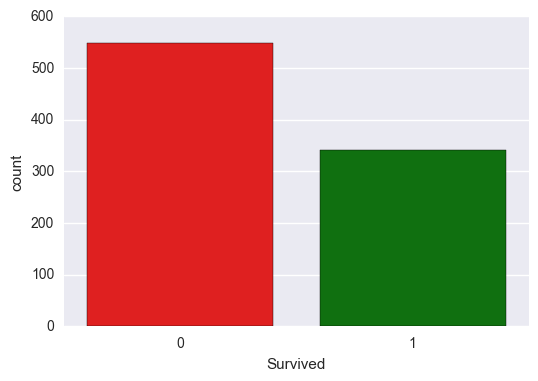

In [45]:
df = pd.pivot_table(data=titanic_df, index='Sex', values='PassengerId', columns='Survived', aggfunc='count')

print("Total Number of females: ", df.loc['female'][0] + df.loc['female'][1])
print("Total Number of females survived: ", df.loc['female'][1] )
print("Total Number of females didnt survive: ", df.loc['female'][0] )
print("Total Number of males: ", df.loc['male'][0] + df.loc['male'][1])
print("Total Number of males survived: ", df.loc['male'][1] )
print("Total Number of males didnt survive: ", df.loc['male'][0])

sns.countplot(x='Survived',data=titanic_df,palette=['r','g'])

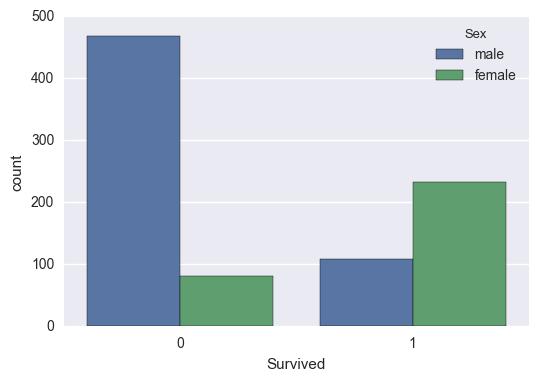

In [46]:
sns.countplot(x='Survived',hue='Sex',data=titanic_df)

I like to see the data in a pie chart as it will give me a better perspective. From the pie chart we can see that 74.2% of the female passengers survived and only 18.9% of the male passengers survived. We can plot the survival probability to be sure.

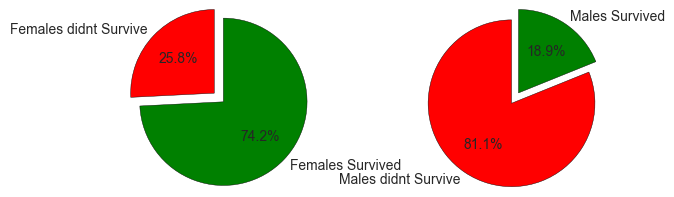

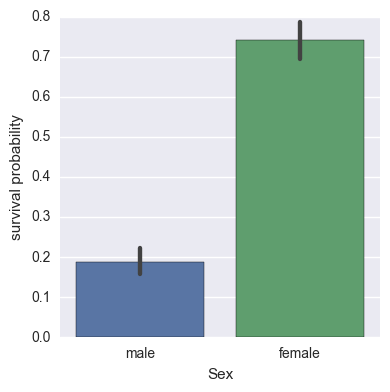

In [52]:
#plots 
fig = plt.figure()
colors = ["r","g"]

ax1 = fig.add_subplot(221)
ax1.pie(df.loc['female'],labels=['Females didnt Survive','Females Survived'],shadow=False,colors=colors,explode=(0, 0.15),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

ax2 = fig.add_subplot(222)
ax2.pie(df.loc['male'],labels=['Males didnt Survive','Males Survived'],shadow=False,colors=colors,explode=(0, 0.15),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.figure()
p1 = sns.factorplot(x="Sex", y="Survived", data=titanic_df, kind="bar")
p1.set_ylabels("survival probability")

Now we have to prove statistically that "Sex" was a factor in deciding if a person survived or not. Looking at the plot we can say that this is the case but we can also perform a hypothesis testing of two population proportions and cosider the people who survived.
Our hypothesis can be as follows:

| Sample size   | Propotions survived   | Sex  |
| ------------- |:-------------:| -----:|
| 314      | 74.5% | Female |
| 577      | 18.9% |   Male |

Let p<sub>1</sub> = Propotions of females survived

Let p<sub>2</sub> = Propotions of males survived

H<sub>0</sub>: p<sub>1</sub> - p<sub>2</sub> = 0 : No difference in the propotions : Null Hypothesis: Passenger's sex did not play a role in determining the survivability.

H<sub>0</sub>: p<sub>1</sub> - p<sub>2</sub> != 0 : Significant difference in the propotions : Alternate Hypothesis : Passenger's sex played an important role in determining the survivability.

Lets perform a two tailed test with a significance level of **.05**. I am using this [link](http://www.kean.edu/~fosborne/bstat/07d2pop.html) as reference to perform my calculations. 

The pooled estimate value (p) = .383

z-statistic value = +-16.3

For a two tailed test with an alpha value of **.05** with **.025** in each tail, the z<sub>critical</sub> value is **+-1.96**. Our z-statistic value is **+-16.3** which is greater then the z<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's sex was responsible in determining if a passenger survived.

Lets now investigate if the passenger's class was a variable that determined the survivability. It will be easy to perform a chi-square test on the grouped population and determine if the effect was random or not.

In [62]:
titanic_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [60]:
survived_df_1 = titanic_df[titanic_df['Survived'] == 1]
survived_df_1.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,136,136,136,136,122,136,136,136,136,117,134
2,87,87,87,87,83,87,87,87,87,13,87
3,119,119,119,119,85,119,119,119,119,6,119


In [61]:
didnt_survive_df = titanic_df[titanic_df['Survived'] == 0]
didnt_survive_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,80,80,80,80,64,80,80,80,80,59,80
2,97,97,97,97,90,97,97,97,97,3,97
3,372,372,372,372,270,372,372,372,372,6,372


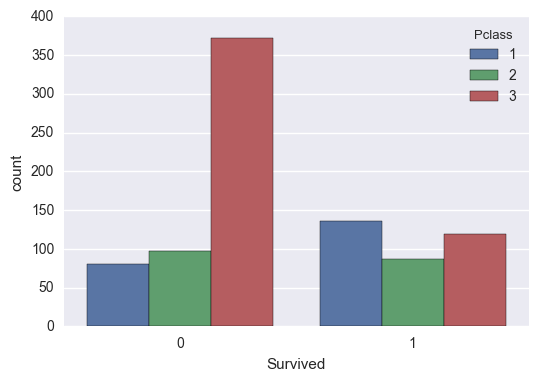

In [68]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_df)

In [70]:
print("Total Number of passengers in first class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[0] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[0])
print("Total Number of passengers in first class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[0] )
print("Total Number of passengers in second class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[1] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[1])
print("Total Number of passengers in second class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[1] )
print("Total Number of passengers in second class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[2] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[2])
print("Total Number of passengers in second class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[2] )

Total Number of passengers in first class :  216
Total Number of passengers in first class survived:  136
Total Number of passengers in second class :  184
Total Number of passengers in second class survived:  87
Total Number of passengers in second class :  491
Total Number of passengers in second class survived:  119


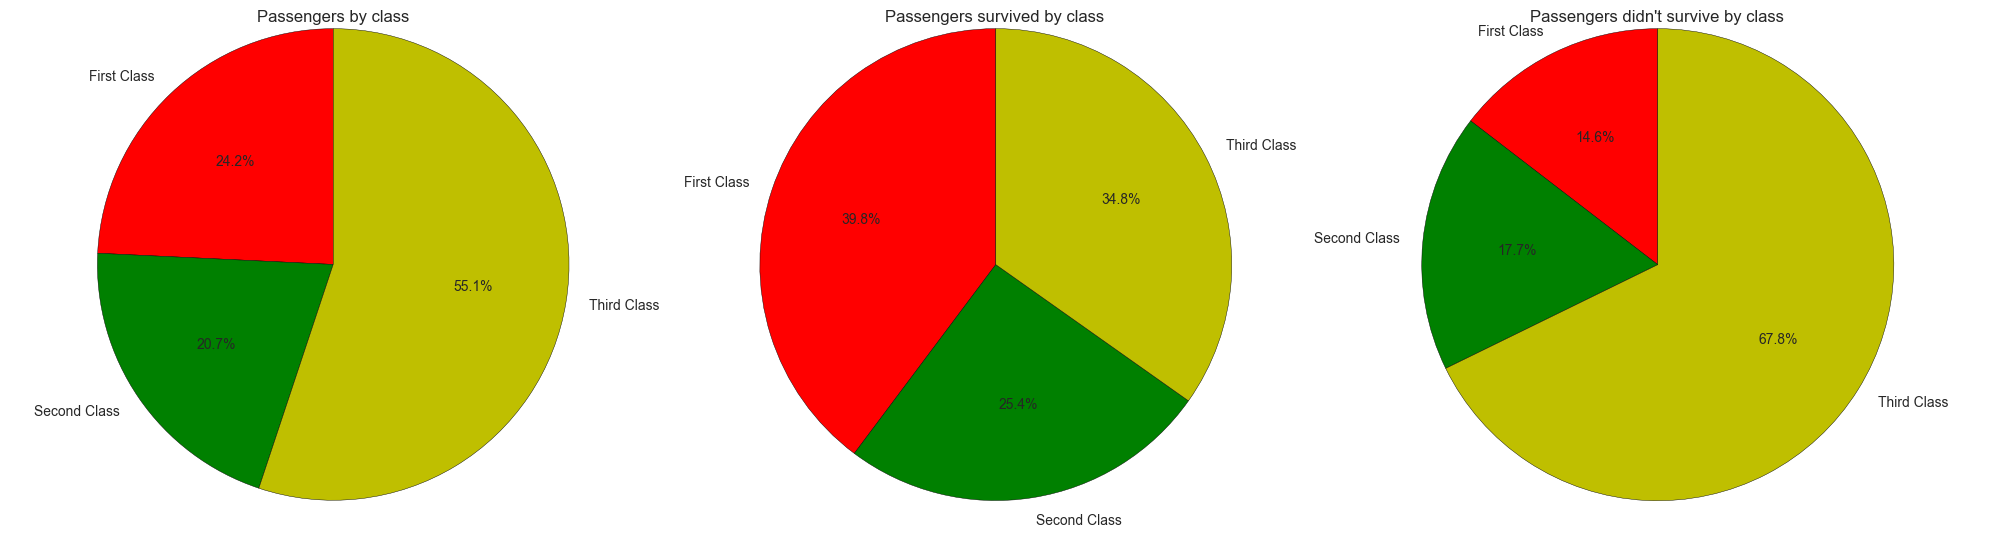

In [88]:
fig = plt.figure(figsize=(20,15))
colors = ["r","g", "y"]

ax1 = fig.add_subplot(331)
ax1.pie(titanic_df.groupby("Pclass").count()["Survived"],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax1.set_title("Passengers by class")
plt.axis('equal')
plt.tight_layout()

ax2 = fig.add_subplot(332)
ax2.pie(survived_df_1.groupby("Pclass").count()["Survived"],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax2.set_title("Passengers survived by class")
plt.axis('equal')
plt.tight_layout()

ax3 = fig.add_subplot(333)
ax3.pie(didnt_survive_df.groupby("Pclass").count()['Survived'],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax3.set_title("Passengers didn't survive by class")
plt.axis('equal')
plt.tight_layout()

